# DeepLabCut Toolbox - Docker
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species*

This notebook demonstrates the necessary steps to use DeepLabCut on your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to use the Docker container to:
- train a network
- evaluate a network
- analyze a novel video

This assumes you already have a project folder with labeled data! 


## Let's look at info about the Docker Environment:


In [ ]:
!nvcc --version

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
#let's make sure we see a GPU:
#tf.test.gpu_device_name()
#or
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

## Start here for training DeepLabCut and analyzing new videos!

In [13]:
#GUIs don't work on in Docker (or the cloud), so label your data locally on your computer! 
#This notebook is for you to train and run video analysis!
import os
os.environ["DLClight"]="True"

In [12]:
# now we are ready to train!
import deeplabcut
deeplabcut.__version__

'2.0.beta'

### change to your path:

In [5]:
path_config_file = '/home/mackenzie/DEEPLABCUT/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/config.yaml' #change to yours!

## Note, if you moved the project, or downloaded this and using the demo code, you will need to edit the project path in the config.yaml file! 

Head over to the project folder to open the yaml file in any text editor (such as gedit in Ubuntu)

(description): project_path:  Full path of the project (edit if you need to move the project to a clus-ter/server/another computer or a different directory on your computer)

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

In [6]:
deeplabcut.create_training_dataset(path_config_file,Shuffles=[1])

/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


### now go edit the pose_cfg.yaml to make display_iters: low (i.e. 10), and save_iters: 500 (for demo's)

Now it is the time to start training the network!

## Start training
This function trains the network for a specific shuffle of the training dataset. 

In [7]:
#reset in case you started a session before...
#tf.reset_default_graph()

deeplabcut.train_network(path_config_file, shuffle=1)

#this will run until you stop it (CTRL+C), or hit "STOP" icon, or when it hits the end (default, 1.3M iterations). 
#Whichever you chose, you will see what looks like an error message, but it's not an error - don't worry....


Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 10,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuffle1.pickle',
 'minsize': 100,
 'mirror': False,
 'mult

INFO:tensorflow:Restoring parameters from /usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt


Restoring parameters from /usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt


Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth': 400, 'topheight': 400, 'bottomheight': 400, 'all_joints': [[0], [1], [2], [3]], 'all_joint

iteration: 10 loss: 0.2609 lr: 0.005
iteration: 20 loss: 0.0656 lr: 0.005
iteration: 30 loss: 0.0448 lr: 0.005
iteration: 40 loss: 0.0349 lr: 0.005
iteration: 50 loss: 0.0310 lr: 0.005
iteration: 60 loss: 0.0316 lr: 0.005
iteration: 70 loss: 0.0264 lr: 0.005
iteration: 80 loss: 0.0301 lr: 0.005
iteration: 90 loss: 0.0274 lr: 0.005
iteration: 100 loss: 0.0257 lr: 0.005
iteration: 110 loss: 0.0301 lr: 0.005
iteration: 120 loss: 0.0239 lr: 0.005
iteration: 130 loss: 0.0270 lr: 0.005
iteration: 140 loss: 0.0283 lr: 0.005
iteration: 150 loss: 0.0232 lr: 0.005
iteration: 160 loss: 0.0276 lr: 0.005
iteration: 170 loss: 0.0223 lr: 0.005
iteration: 180 loss: 0.0226 lr: 0.005
iteration: 190 loss: 0.0217 lr: 0.005
iteration: 200 loss: 0.0228 lr: 0.005
iteration: 210 loss: 0.0223 lr: 0.005
iteration: 220 loss: 0.0213 lr: 0.005
iteration: 230 loss: 0.0238 lr: 0.005
iteration: 240 loss: 0.0174 lr: 0.005
iteration: 250 loss: 0.0205 lr: 0.005
iteration: 260 loss: 0.0218 lr: 0.005
iteration: 270 loss: 

KeyboardInterrupt: 

### A couple tips for possible troubleshooting (1): 

if you get **permission errors** when you run this step (above), first check if the weights downloaded. As some docker containers might not have privileges for this (it can be user specific). They should be under 'init_weights' (see path in the pose_cfg.yaml file). You can enter the DOCKER in the terminal:

see more here: https://github.com/MMathisLab/Docker4DeepLabCut2.0#using-the-docker-for-training-and-video-analysis

You can "cd" in the terminal to this location! i.e. copy and paste this in: **"cd usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/
"** 

And if you type "ls" to see the list of files, you should see the resnet:
**resnet_v1_50.ckpt**

If it is not there, run **"sudo download.sh"**
then change the permissions: **"sudo chown yourusername:yourusername resnet_v1_50.ckpt"**


### Troubleshooting (2): 
if it appears the training does not start (i.e. "Starting training..." does not print immediately),
then you have another session running on your GPU. Go check "nvidia-smi" and look at the process names. You can only have 1 per GPU!)

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [8]:
deeplabcut.evaluate_network(path_config_file)

# Here you want to see a low pixel error! Of course, it can only be as good as the labeler, so be sure your labels are good!

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 10,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuffle1.pickle',
 'minsize': 100,
 'mirror': False,
 'mult

Running  DeepCut_resnet50_ReachingAug30shuffle1_1000  with # of trainingiterations: 1000
INFO:tensorflow:Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-1000


Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-1000
0it [00:00, ?it/s]

Analyzing data...


20it [00:01, 16.04it/s]


Done and results stored for snapshot:  snapshot-1000
Results for 1000  training iterations: 95 1 train error: 7.57 pixels. Test error: 4.95  pixels.
With pcutoff of 0.1  train error: 7.57 pixels. Test error: 4.95 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## There is an optional refinement step
- if your pixel errors are not low enough, please check out the protocol guide on how to refine your network!
- You will need to adjust the labels **outside of DOCKER!** We recommend coming back to train and analyze videos... 
- pplease see the repo and protocol instructions on how to refine your data!

## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [9]:
videofile_path = ['/home/mackenzie/DEEPLABCUT/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi'] #Enter the list of videos to analyze.
deeplabcut.analyze_videos(path_config_file,videofile_path)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 10,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.6/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuffle1.pickle',
 'minsize': 100,
 'mirror': False,
 'mult

Using snapshot-1000 for model /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1
INFO:tensorflow:Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-1000


Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-1000
  0%|          | 0/256 [00:00<?, ?it/s]

/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Starting %  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Loading  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Duration of video [s]:  8.53 , recorded with  30.0 fps!
Overall # of frames:  256 without cropped frame dimensions:  840 743
Starting to extract posture


260it [00:15, 17.76it/s]                         

Saving results in /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [10]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

  2%|▏         | 4/256 [00:00<00:07, 33.33it/s]

Starting %  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos ['/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi']
Loading  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi and data.
False 0 840 0 743
256
Duration of video [s]:  8.53 , recorded with  30.0 fps!
Overall # of frames:  256 with cropped frame dimensions:  840 743
Generating frames and creating video.


100%|██████████| 256/256 [00:04<00:00, 54.21it/s]


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Starting %  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos ['/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi']
/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos  already exists!
Loading  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi and data.


<IPython.core.display.Javascript object>


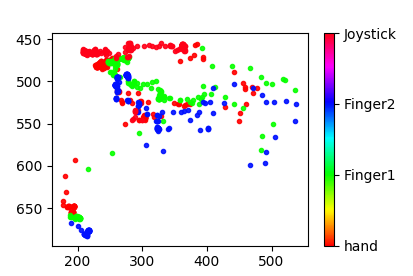

<IPython.core.display.Javascript object>


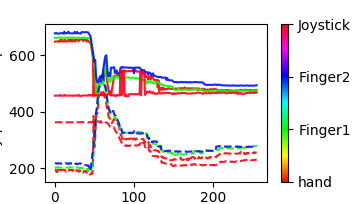

<IPython.core.display.Javascript object>


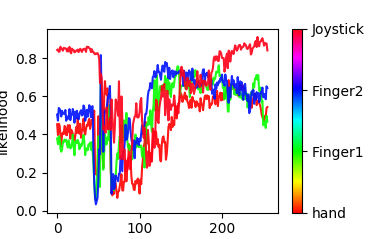

<IPython.core.display.Javascript object>


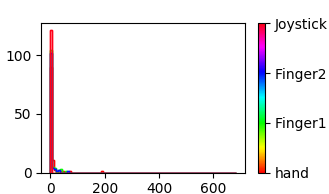

Plots created! Please check the directory "plot-poses" within the video directory


In [11]:
%matplotlib notebook 
#for making interactive plots.
#deeplabcut.plot_trajectories(path_config_file,videofile_path, plotting=True)

deeplabcut.plot_trajectories(path_config_file,videofile_path,showfigures=True)